In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

params = {'figure.figsize' : (10,5),
          'xtick.labelsize': 14,
          'ytick.labelsize': 15,
          'axes.labelsize' : 20,
          'axes.titlesize' : 20,
          'legend.fontsize': 15,
          'lines.linewidth': 3,
          'text.usetex': True}
#    "font.family": "sans-serif",
#    "font.sans-serif": ["Helvetica"]}
        
plt.rcParams.update(params)

import FD
from sympy import Symbol, diff, cos, sin, exp, tan
from sympy.utilities.lambdify import lambdify


In [54]:
def line(x,x0,x1,y0,y1):
    """
    Dados dos puntos en el plano, cálcula la pendiente de
    la recta que pasa por esos puntos y regresa los puntos
    que pasan por esa recta.
    """
    return ((y1-y0)/(x1-x0))*(x-x0) + y0

def numericalDer(f, x0, h, r, aprox = 'All'):
    t = Symbol('x')
    fp = diff(f,t)
    evalfp = lambdify(t, fp, modules=['numpy'])    
    evalf = lambdify(t, f, modules=['numpy'])
   
    xl = np.linspace(x0 - h * 1.50, x0 + h * 1.50, 50)
    xv = np.linspace(x0 - r * np.pi, x0 + r * np.pi, 50)
    
    lf = line(xl, x0, x0 + h, evalf(x0), evalf(x0 + h))
    lb = line(xl, x0, x0 - h, evalf(x0), evalf(x0 - h))
    lc = line(xl, x0-h, x0+h, evalf(x0-h), evalf(x0+h))

    yv = evalf(xv)
    yp = evalfp(xv)

    ancho_linea = 2.0
    
    f0 = evalf(x0)
    f0ph = evalf(x0+h)
    offset = h * 1.5
    fig = plt.figure(figsize=(8,5))
    plt.plot(xv, yv, '-', lw = 3, color='k', label = '$f(x)$')
    plt.scatter([x0,x0], [0,f0], facecolor ='b', edgecolor='k', zorder=10)
#    plt.plot([x0-offset,x0+offset], [f0, f0], lw = 4, color='r',zorder=0)
    
    if aprox == 'Points':
        plt.scatter([x0+2*h, x0+2*h], [0,evalf(x0+2*h)], facecolor ='orange', edgecolor='k', zorder=10)
        plt.scatter([x0+h, x0+h], [0,evalf(x0+h)], facecolor ='orange', edgecolor='k', zorder=10)
        plt.scatter([x0-h, x0-h], [0,evalf(x0-h)], facecolor ='w', edgecolor='k', zorder=10)  
        plt.scatter([x0-2*h, x0-2*h], [0,evalf(x0-2*h)], facecolor ='w', edgecolor='k', zorder=10)       
     
        plt.plot([x0, x0],[0,evalf(x0)],'g--', lw=1)
        plt.plot([x0+h, x0+h],[0,evalf(x0+h)],'g--', lw=1)
        plt.plot([x0-h, x0-h],[0,evalf(x0-h)],'g--', lw=1)
        plt.plot([x0+2*h, x0+2*h],[0,evalf(x0+2*h)],'g--', lw=1)
        plt.plot([x0-2*h, x0-2*h],[0,evalf(x0-2*h)],'g--', lw=1)
        plt.xticks(ticks=[x0-2*h, x0-h, x0, x0+h, x0+2*h], 
                   labels=['$x_o-2h$', '$x_o-h$', '$x_o$', '$x_o+h$', '$x_o+2h$'])
        plt.yticks(ticks=[])
     #   plt.ylabel('$f(x)$')
        
        plt.text(x0+0.05,0.02,'$i$', {'fontsize':12})
        plt.text(x0+h+0.05,0.02,'$i+1$', {'fontsize':12})
        plt.text(x0+2*h+0.05,0.02,'$i+2$', {'fontsize':12})
        plt.text(x0-h+0.05,0.02,'$i-1$', {'fontsize':12})
        plt.text(x0-2*h+0.05,0.02,'$i-2$', {'fontsize':12})  
        
    if aprox == 'All':
        plt.scatter(x0+h, evalf(x0+h), facecolor ='w', edgecolor='k', zorder=10)
        plt.scatter(x0-h, evalf(x0-h), facecolor ='w', edgecolor='k', zorder=10)
        plt.plot(xl, lf, lw = ancho_linea, label="$D_+ f(x_o)$")
        plt.plot(xl, lb, lw = ancho_linea, label="$D_- f(x_o)$") 
        plt.plot(xl, lc, lw = ancho_linea, label="$D_0 f(x_o)$")
        
        plt.plot([x0, x0],[0,evalf(x0)],'g--', lw=1)
        plt.plot([x0+h, x0+h],[0,evalf(x0+h)],'g--', lw=1)
        plt.plot([x0-h, x0-h],[0,evalf(x0-h)],'g--', lw=1)

#        plt.plot([x0 - np.pi*0.5, x0 + np.pi*0.5], [1,1], 'r-', 
#                 lw = 4, zorder=0)
            
        plt.xticks(ticks=[x0-h, x0, x0+h], 
                   labels=['$x_o-h$', '$x_o$', '$x_o+h$'])
        plt.yticks(ticks=[], 
                   labels=[])
        
    elif aprox == 'Forward_hs':
        plt.scatter(x0+h, evalf(x0+h), facecolor ='w', edgecolor='k', zorder=10)   
        plt.plot(xl, lf, lw = ancho_linea, label="$x_{a} = x_o+h$")

        plt.scatter(x0+0.5*h, evalf(x0+0.5*h), facecolor ='w', edgecolor='k', zorder=10)   
        plt.plot(xl,
                 line(xl, x0, x0 + h*0.5, evalf(x0), evalf(x0 + h*0.5)),
                 lw = ancho_linea, label="$x_{b} = x_o+h/2$")

        plt.scatter(x0+0.25*h, evalf(x0+0.25*h), facecolor ='w', edgecolor='k', zorder=10)   
        plt.plot(xl,
                 line(xl, x0, x0 + h*0.25, evalf(x0), evalf(x0 + h*0.25)),
                 lw = ancho_linea, label="$x_{c} = x_o+h/4$")        
        
#        plt.plot([x0 - np.pi*0.5, x0 + np.pi*0.5], [1,1], 'r-', 
#                 lw = 4, label='$\dfrac{df(x_o)}{dx}$', zorder=0)
        
        plt.plot([x0, x0],[0,evalf(x0)],'g--', lw=1)
        plt.plot([x0+0.25*h, x0+0.25*h],[0,evalf(x0+0.25*h)],'g--', lw=1)
        plt.plot([x0+0.5*h, x0+0.5*h],[0,evalf(x0+0.5*h)],'g--', lw=1)
        plt.plot([x0+h, x0+h],[0,evalf(x0+h)],'g--', lw=1)

#        plt.plot([0, x0], [evalf(x0), evalf(x0)], 'g--', lw=1)
#        plt.plot([0, x0+h], [evalf(x0+h), evalf(x0+h)], 'g--', lw=1)
#        plt.plot([0, x0+0.25*h], [evalf(x0+0.25*h), evalf(x0+0.25*h)], 'g--', lw=1)
#        plt.plot([0, x0+0.5*h], [evalf(x0+0.5*h), evalf(x0+0.5*h)], 'g--', lw=1)
        
        plt.xticks(ticks=[x0, x0+0.25*h, x0+0.5*h, x0+h], 
                   labels=['$x_o$', '$x_{c}$', '$x_{b}$', '$x_{a}$'],
                  rotation='vertical')
        plt.yticks(ticks=[], 
                   labels=[])

    elif aprox == 'Forward':
        plt.scatter(x0+h, evalf(x0+h), facecolor ='w', edgecolor='k', zorder=10)   
        plt.plot(xl, lf, lw = ancho_linea, label="$Forward$")      
        
        plt.plot([x0, x0],[0,evalf(x0)],'g--', lw=1)
        plt.plot([x0+h, x0+h],[0,evalf(x0+h)],'g--', lw=1)
        plt.plot([0, x0], [evalf(x0), evalf(x0)], 'g--', lw=1)
        plt.plot([0, x0+h], [evalf(x0+h), evalf(x0+h)], 'g--', lw=1)
        
        plt.xticks(ticks=[x0, x0+h], 
                   labels=['$x_o$', '$x_o+h$'])
        plt.yticks(ticks=[evalf(x0), evalf(x0+h)], 
                   labels=['$f(x_o)$', '$f(x_o+h)$'])

    elif aprox == 'Backward':
        plt.scatter(x0-h, evalf(x0-h), facecolor ='w', edgecolor='k', zorder=10)
        plt.plot(xl, lb, lw = ancho_linea, label="f' = Backward")
        
    elif aprox == 'Centered':
        plt.scatter(x0+h, evalf(x0+h), facecolor ='w', edgecolor='k', zorder=10)   
        plt.scatter(x0-h, evalf(x0-h), facecolor ='w', edgecolor='k', zorder=10)
        plt.plot(xl, lc, lw = ancho_linea, label="f' = Centered")  
        

    plt.legend(loc='upper left', 
               ncol=1, framealpha=0.99)
    ax = fig.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    plt.savefig(aprox+'.pdf')
    plt.show()

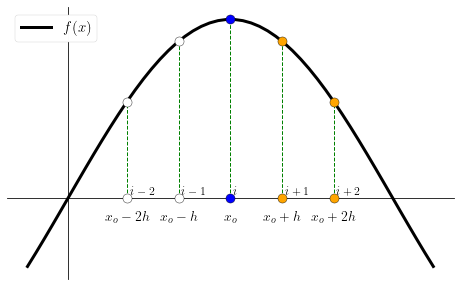

In [55]:
# Definimos un arreglo con diferentes tamaños de h:
r = 1.25
N = 5
h = np.zeros(N)

h[0] = 1.0
for i in range(1,N):
    h[i] = h[i-1] * 0.5

# Definimos un arreglo con valores de 1.0 (donde evaluaremos el cos(x)):
t = Symbol('x')
numericalDer(sin(0.5*t), np.pi * 1., h[0], r, 'Points')

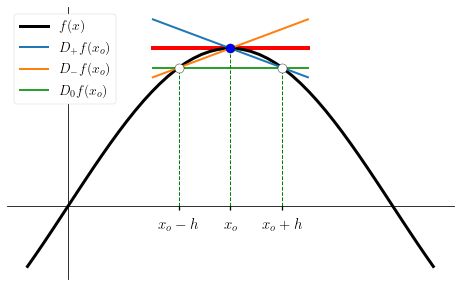

In [46]:
# Definimos un arreglo con diferentes tamaños de h:
r = 1.25
N = 5
h = np.zeros(N)

h[0] = 1.0
for i in range(1,N):
    h[i] = h[i-1] * 0.5

# Definimos un arreglo con valores de 1.0 (donde evaluaremos el cos(x)):
t = Symbol('x')
numericalDer(sin(0.5*t), np.pi * 1., h[0], r, 'All')

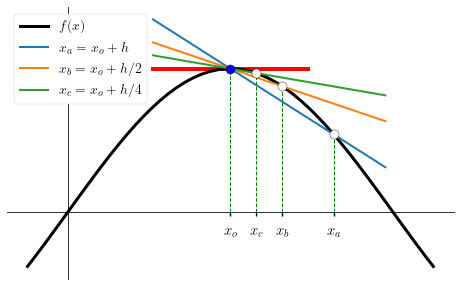

In [36]:
# Definimos un arreglo con diferentes tamaños de h:
r = 1.25
N = 5
h = np.zeros(N)

h[0] = 2.0
for i in range(1,N):
    h[i] = h[i-1] * 0.5

# Definimos un arreglo con valores de 1.0 (donde evaluaremos el cos(x)):
t = Symbol('x')
numericalDer(sin(0.5*t), np.pi * 1., h[0], r, 'Forward_hs')


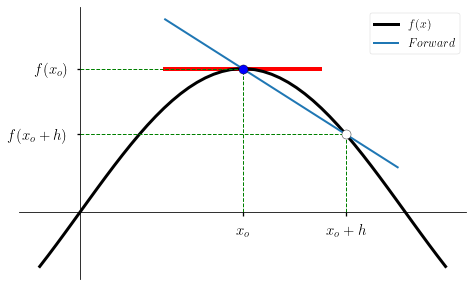

In [24]:
# Definimos un arreglo con diferentes tamaños de h:
r = 1.25
N = 5
h = np.zeros(N)

h[0] = 2.0
for i in range(1,N):
    h[i] = h[i-1] * 0.5

# Definimos un arreglo con valores de 1.0 (donde evaluaremos el cos(x)):
t = Symbol('x')
numericalDer(sin(0.5*t), np.pi * 1., h[0], r, 'Forward')